# 项目：沃尔玛销售数据分析及其可视化

## 1. 简介

### 分析目标

本实战项目的目的是，练习评估数据的结构性问题和内容性问题，并且基于评估结果对沃尔玛的销售数据进行清洗、整理，从而得到干净、整洁的数据，供下一步用于探索不同地区沃尔玛零售店销售额的影响因素，通过进一步创建预测模型，可以预测未来X个月/年的销售情况，并针对零售门店库存管理方面的问题提出建议，以使得供应与需求更加匹配。。

#### 数据每列的含义如下：


- `Store`：店铺编号
- `Date`：销售周
- `Weekly_Sales`：店铺在该周的销售额
- `Holiday_Flag`：是否为假日周
- `Temperature`：销售日的温度
- `Fuel_Price`：该地区的燃油成本
- `CPI（消费者物价指数）`：消费者物价指数
- `Unemployment`：失业率

## 2. 读取数据

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' %x)

In [2]:
cleaned_data = pd.read_csv('cleaned_data.csv', index_col=['Unnamed: 0'])
cleaned_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,TemperatureBand,CPIBand,UnemploymentBand,Fuel_PriceBand
0,1,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,1,1,3,3,1
1,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,1,1,3,3,1
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,1,1,3,3,1
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,1,1,3,3,1
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,1,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.950,0,64.880,3.997,192.014,8.684,3,3,3,4,4
6431,45,2012-10-05,733455.070,0,64.890,3.985,192.170,8.667,4,3,3,4,4
6432,45,2012-10-12,734464.360,0,54.470,4.000,192.327,8.667,4,2,3,4,4
6433,45,2012-10-19,718125.530,0,56.470,3.969,192.331,8.667,4,2,3,4,4


## 3. 数据分析与可视化

### 3.1 对数据进行排序、观察

#### 3.1.1 按照销售额以升序进行排序

In [3]:
cleaned_data.sort_values("Weekly_Sales")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,TemperatureBand,CPIBand,UnemploymentBand,Fuel_PriceBand
4619,33,2010-12-03,209986.250,0,52.820,3.041,126.731,9.265,4,2,1,4,2
4614,33,2010-10-29,213538.320,0,71.340,3.130,126.436,9.265,4,3,1,4,2
4675,33,2011-12-30,215359.210,1,51.600,3.428,130.071,8.010,4,2,1,3,2
4623,33,2010-12-31,219804.850,1,52.910,3.148,127.088,9.265,4,2,1,4,2
4671,33,2011-12-02,220060.350,0,59.120,3.701,129.846,8.010,4,2,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,13,2010-12-24,3595903.200,0,34.900,2.846,126.984,7.795,4,1,1,2,1
527,4,2011-12-23,3676388.980,0,35.920,3.103,129.985,5.143,4,1,1,1,2
1333,10,2010-12-24,3749057.690,0,57.060,3.236,126.984,9.003,4,2,1,4,2
2763,20,2010-12-24,3766687.430,0,25.170,3.141,204.638,7.484,4,1,3,2,2


从以上输出结果来看，销售额最低的貌似是Q4的33号沃尔玛门店，温度为华氏度52-72，相当于摄氏度12-22，对应失业率在8以上，高于平均值，可能该地区当时经济状况不是很好。  
***温度和失业率可能都对销售额有较强的影响。***

In [4]:
# 按照门店ID分组，再按照温度、失业率以升序进行排序
cleaned_data.groupby("Store").apply(lambda x: x.sort_values(["Temperature","Unemployment"], ascending=False)).head(20)

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
Store                                                                   
1     78       1  2011-08-05   1624383.750             0       91.650   
      79       1  2011-08-12   1525147.090             0       90.760   
      80       1  2011-08-19   1530761.430             0       89.940   
      75       1  2011-07-15   1455119.970             0       88.540   
      81       1  2011-08-26   1464693.460             0       87.960   
      82       1  2011-09-02   1550229.220             0       87.830   
      26       1  2010-08-06   1605491.780             0       87.160   
      27       1  2010-08-13   1508237.760             0       87.000   
      77       1  2011-07-29   1352219.790             0       86.830   
      28       1  2010-08-20   1513080.490             0       86.650   
      71       1  2011-06-17   1532114.860             0       86.410   
      130      1  2012-08-03   1631135.790             0       86.110   
      74       1  2011-07-08   1534849.640             0       85.830   
      76       1  2011-07-22   1396926.820             0       85.770   
      73       1  2011-07-01   1488538.090             0       85.550   
      29       1  2010-08-27   1449142.920             0       85.220   
      131      1  2012-08-10   1592409.970             0       85.050   
      125      1  2012-06-29   1540421.490             0       84.880   
      132      1  2012-08-17   1597868.050             0       84.850   
      20       1  2010-06-25   1422711.600             0       84.340   

           Fuel_Price     CPI  Unemployment  Quarter  TemperatureBand  \
Store                                                                   
1     78        3.684 215.545         7.962        3                4   
      79        3.638 215.606         7.962        3                4   
      80        3.554 215.669         7.962        3                4   
      75        3.575 215.361         7.962        3                4   
      81        3.523 215.733         7.962        3                4   
      82        3.533 215.797         7.962        3                4   
      26        2.627 211.505         7.787        3                4   
      27        2.692 211.639         7.787        3                4   
      77        3.682 215.483         7.962        3                4   
      28        2.664 211.603         7.787        3                4   
      71        3.637 214.998         7.682        2                4   
      130       3.417 221.950         6.908        3                4   
      74        3.480 215.277         7.962        3                4   
      76        3.651 215.422         7.962        3                4   
      73        3.524 215.184         7.962        3                4   
      29        2.619 211.567         7.787        3                4   
      131       3.494 221.958         6.908        3                4   
      125       3.286 221.843         7.143        2                4   
      132       3.571 222.038         6.908        3                4   
      20        2.653 211.339         7.808        2                4   

           CPIBand  UnemploymentBand  Fuel_PriceBand  
Store                                                 
1     78         4                 3               3  
      79         4                 3               3  
      80         4                 3               3  
      75         4                 3               3  
      81         4                 3               3  
      82         4                 3               3  
      26         3                 2               1  
      27         3                 2               1  
      77         4                 3               3  
      28         3                 2               1  
      71         4                 2               3  
      130        4                 2               2  
      74         4         

从以上结果来看，好像失业率影响作用更强一些，同样高温的情况下，失业率低时销售额高。

#### 5.1.2 按是否为假日周进行降序排序

In [5]:
cleaned_data.groupby("Store").apply(lambda x: x.sort_values(["Holiday_Flag"], ascending=False)).sample(10)

,,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarter,TemperatureBand,CPIBand,UnemploymentBand,Fuel_PriceBand
Store,,,,,,,,,,,,,,
12,1622,12,2011-01-14,812011.800,0,43.150,3.312,127.301,14.021,1,1,1,4,2
30,4205,30,2011-03-18,425470.840,0,63.260,3.488,214.016,8.028,1,3,4,3,3
24,3399,24,2012-03-16,1239299.120,0,48.680,4.021,137.584,8.659,1,2,2,4,4
7,864,7,2010-03-19,574450.230,0,29.040,2.692,189.734,9.014,1,1,3,4,1
6,717,6,2010-02-19,1567138.070,0,43.580,2.514,212.816,7.259,1,1,4,2,1
41,5728,41,2010-04-02,1168826.390,0,41.310,2.725,189.705,7.363,2,1,3,2,1
1,76,1,2011-07-22,1396926.820,0,85.770,3.651,215.422,7.962,3,4,4,3,3
4,528,4,2011-12-30,2007105.860,1,36.890,3.119,130.071,5.143,4,1,1,1,2
24,3339,24,2011-01-21,1107170.390,0,23.690,3.391,133.029,8.252,1,1,2,3,2


以上结果似乎表明，非假日周可能销售额会更高一些。

In [6]:
cleaned_data.groupby("Store").apply(lambda x: x.sort_values(["Holiday_Flag", "Fuel_Price"], ascending=False))

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  \
Store                                                                    
1     135       1  2012-09-07   1661767.330             1       83.960   
      83        1  2011-09-09   1540471.240             1       76.000   
      105       1  2012-02-10   1802477.430             1       48.020   
      94        1  2011-11-25   2033320.660             1       60.140   
      99        1  2011-12-30   1497462.720             1       44.550   
...           ...         ...           ...           ...          ...   
45    6294     45  2010-02-19    841264.040             0       31.270   
      6322     45  2010-09-03    790144.700             0       78.370   
      6325     45  2010-09-24    678228.580             0       68.590   
      6326     45  2010-10-01    690007.760             0       70.580   
      6324     45  2010-09-17    716987.580             0       66.550   

            Fuel_Price     CPI  Unemployment  Quarter  TemperatureBand  \
Store                                                                    
1     135        3.730 222.439         6.908        3                4   
      83         3.546 215.861         7.962        3                4   
      105        3.409 220.265         7.348        1                2   
      94         3.236 218.468         7.866        4                2   
      99         3.129 219.536         7.866        4                1   
...                ...     ...           ...      ...              ...   
45    6294       2.745 182.035         8.992        1                1   
      6322       2.715 182.604         8.743        3                4   
      6325       2.713 182.670         8.743        3                3   
      6326       2.707 182.717         8.724        4                3   
      6324       2.706 182.623         8.743        3                3   

            CPIBand  UnemploymentBand  Fuel_PriceBand  
Store                                                  
1     135         4                 2               3  
      83          4                 3               3  
      105         4                 2               2  
      94          4                 2               2  
      99          4                 2               2  
...             ...               ...             ...  
45    6294        2                 4               1  
      6322        2                 4               1  
      6325        3                 4               1  
      6326        3                 4               1  
      6324        3                 4               1  

[6435 rows x 13 columns]

门店销售额应该与燃油价、消费者物价指数都有一定关系，但是从上面结果来看，应该是有地区差异的。有些地区可能本来经济发展就比较落后，且失业率较高，这自然会影响到销售额。

### 3.2 描述性分析及其可视化

#### 3.2.1 计算假日周和非假日周的平均销售额

In [7]:
# 所有沃尔玛门店假日周、非假日周的销售额
means_by_holiday = cleaned_data.groupby("Holiday_Flag")['Weekly_Sales'].mean()
means_by_holiday

Holiday_Flag
0   1041256.380
1   1122887.892
Name: Weekly_Sales, dtype: float64

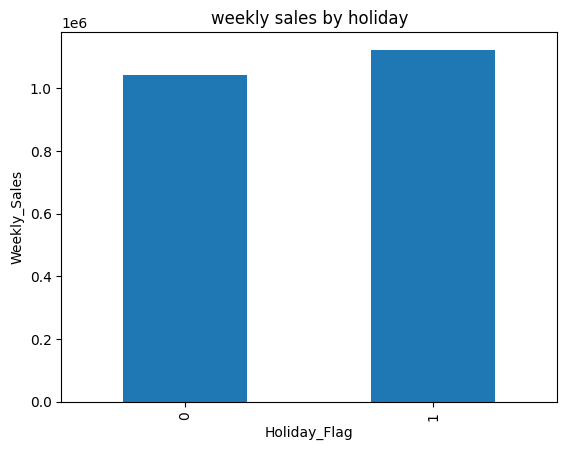

In [8]:
fig = plt.figure()
means_by_holiday.plot.bar()
plt.title('weekly sales by holiday')
plt.xlabel("Holiday_Flag")
plt.ylabel("Weekly_Sales")
plt.show()

Text(0, 0.5, 'weekly sales')

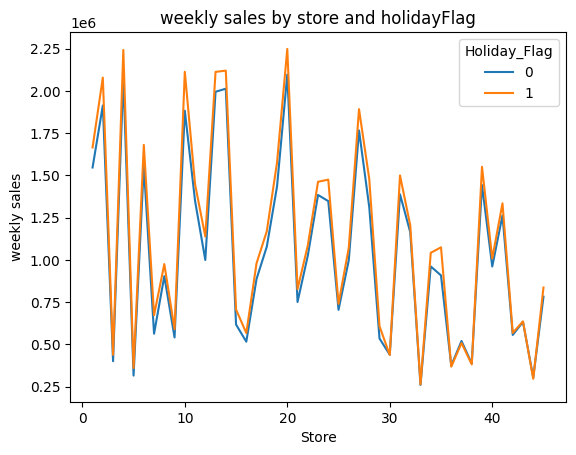

In [9]:
# 各个沃尔玛门店假日周、非假日周的销售额
means_groupby_store_holiday = cleaned_data.groupby(["Store", "Holiday_Flag"])['Weekly_Sales'].mean()
means_groupby_store_holiday.unstack().plot()
plt.title('weekly sales by store and holidayFlag')
plt.ylabel('weekly sales')

从上图可以看出，对于各个沃尔玛门店，非假日周的销售额普遍低于假日周的销售额。  
同时，我们可以看出，销售额具有地区/门店差异性，有将近一半门店的周销售额低于1000,000。  
  
⭐后续分析可以进一步探索这些低销售额的门店的共性。

#### 3.2.2 计算不同等级失业率下的平均销售额

In [10]:
means_by_unemployment = cleaned_data.groupby("UnemploymentBand")['Weekly_Sales'].mean()
means_by_unemployment

UnemploymentBand
1    997562.939
2   1155005.059
3   1108340.169
4    924011.534
Name: Weekly_Sales, dtype: float64

出现了一个有趣的现象，随着失业率的递增，销售额呈先上升后下降的趋势。  
  
⭐后续分析可以再关注一下低失业率条件下，为什么销售额并没有预期的那么高？

Text(0, 0.5, 'weekly sales')

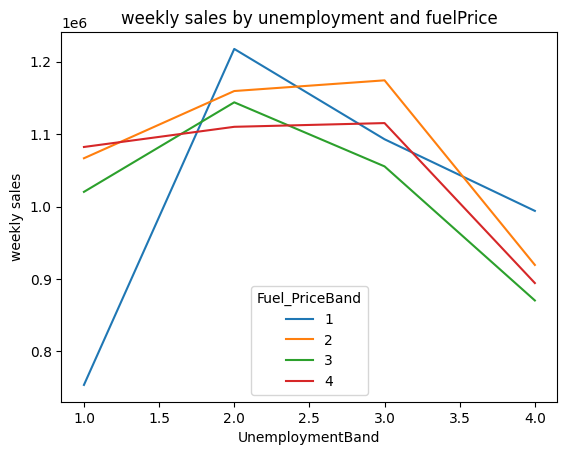

In [11]:
means_by_unemployment_fuelPrice = cleaned_data.groupby(["UnemploymentBand", "Fuel_PriceBand"])['Weekly_Sales'].mean()
means_by_unemployment_fuelPrice.unstack().plot()
plt.title('weekly sales by unemployment and fuelPrice')
plt.ylabel('weekly sales')

又出现了上面所观察到的现象，低失业率时销售额反而并没有很高，而且出现了一个极端值情况，即当失业率低、燃油价格也低时，销售额竟然也出奇地低。
  
这两个变量之间可能有交互作用，或者说两者都是影响销售额的关键因素。

#### 3.2.3 计算不同等级CPI下的平均销售额

In [12]:
# 所有沃尔玛门店在不同CPI下的销售额
means = cleaned_data.groupby("CPIBand")['Weekly_Sales'].mean()
means

CPIBand
1   1062885.286
2   1122758.017
3   1028030.134
4    974323.150
Name: Weekly_Sales, dtype: float64

销售额也是随着CPI物价指数的递增呈先上升后下降的趋势。

Text(0, 0.5, 'weekly sales')

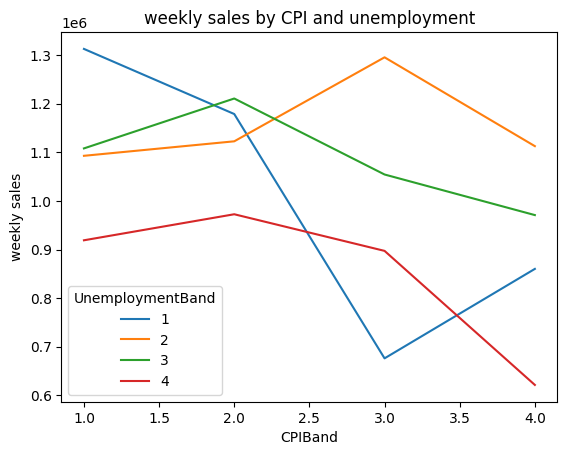

In [13]:
means_by_CPI_unemployment = cleaned_data.groupby([ "CPIBand", "UnemploymentBand"])['Weekly_Sales'].mean()
means_by_CPI_unemployment.unstack().plot()
plt.title('weekly sales by CPI and unemployment')
plt.ylabel('weekly sales')

从以上结果可以看出，失业率处于中高水平时，销售额随CPI水平变化的趋势比较一致，都是先上升后下降；而失业率处于中低水平时，销售额随CPI水平变化的趋势不一致，比较不稳定。

#### 3.2.4 计算不同温度水平下的平均销售额 

In [14]:
# 不同等级温度条件下的销售额
means_groupby_Temperature = cleaned_data.groupby("TemperatureBand")['Weekly_Sales'].mean()
means_groupby_Temperature

TemperatureBand
1   1092913.367
2   1050522.193
3   1054986.733
4    989442.203
Name: Weekly_Sales, dtype: float64

Text(0, 0.5, 'weekly sales')

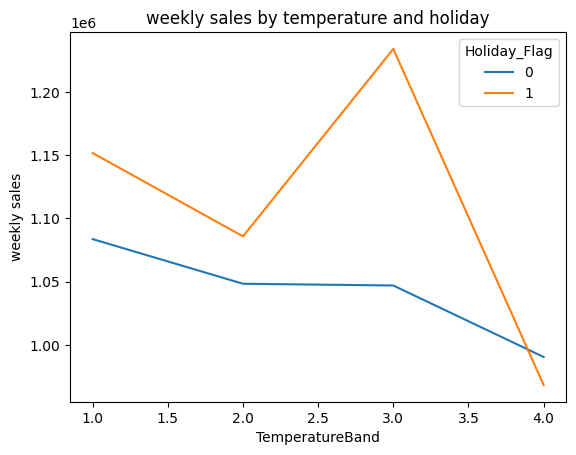

In [15]:
means_groupby_temperature_holiday = cleaned_data.groupby(["TemperatureBand", "Holiday_Flag"])['Weekly_Sales'].mean()
means_groupby_temperature_holiday.unstack().plot()
plt.title('weekly sales by temperature and holiday')
plt.ylabel('weekly sales')

对于非假日周来说，温度越高销售额越低；而对于假日周，随着温度升高销售额有一个突增的转折点，考虑到欧美地区人们喜欢烈日出行晒太阳，可能与此有关系。

#### 3.2.5 不同门店的平均销售额

Text(0, 0.5, 'weekly sales')

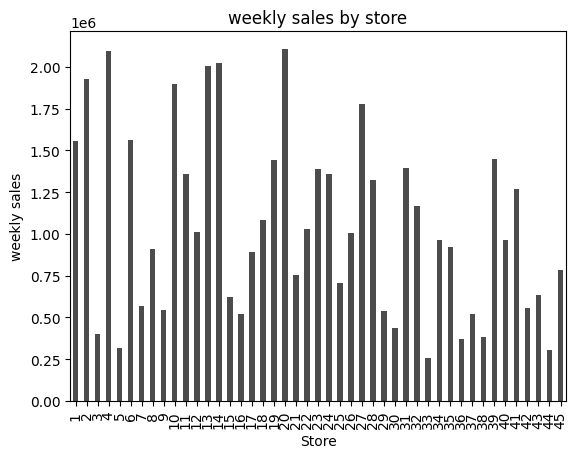

In [16]:
means_by_store = cleaned_data.groupby(["Store"])['Weekly_Sales'].mean()
means_by_store.plot.bar(color='k', alpha=0.7)
plt.title('weekly sales by store')
plt.ylabel('weekly sales')

#### 3.2.6 可视化展示不同假日周、失业率等级、CPI等级所对应的销售额的分布情况

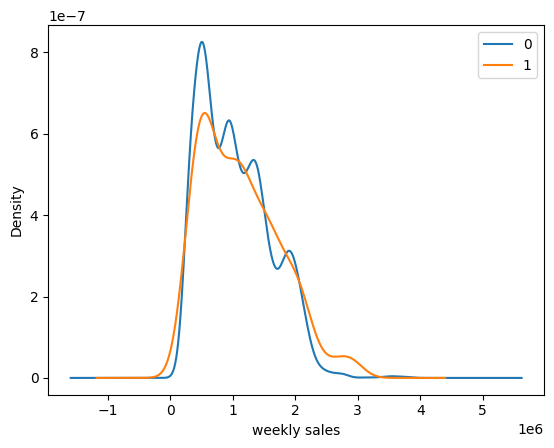

In [17]:
# 假日周与非假日周的销售额分布情况
cleaned_data.Weekly_Sales[cleaned_data.Holiday_Flag == 0].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.Holiday_Flag == 1].plot(kind='kde')
plt.xlabel("weekly sales")
plt.legend((0,1), loc='best')

看起来假日周、非假日周销售额都有一点点正偏态。

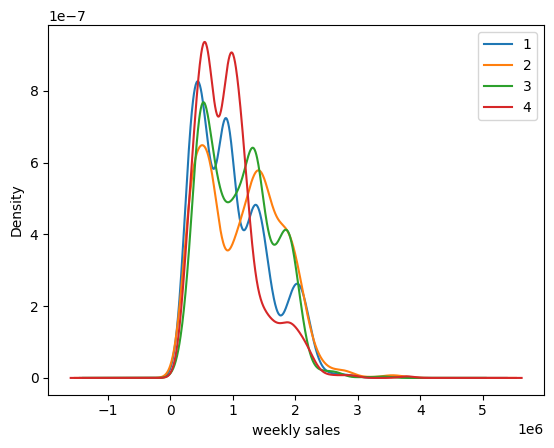

In [18]:
# 不同失业率等级的销售额分布情况
cleaned_data.Weekly_Sales[cleaned_data.UnemploymentBand == 1].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.UnemploymentBand == 2].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.UnemploymentBand == 3].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.UnemploymentBand == 4].plot(kind='kde')
plt.xlabel("weekly sales")
plt.legend((1,2,3,4), loc='best')

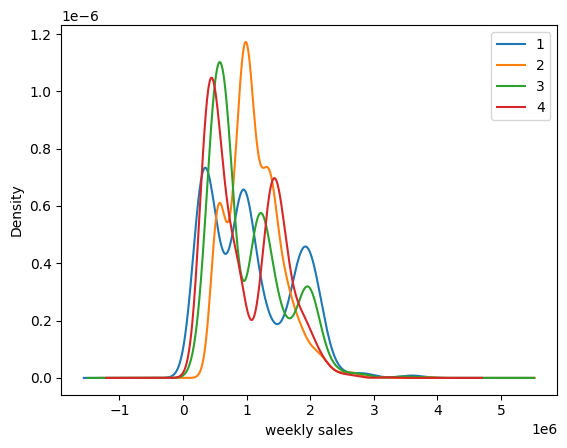

In [19]:
# 不同CPI等级的销售额分布情况
cleaned_data.Weekly_Sales[cleaned_data.CPIBand == 1].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.CPIBand == 2].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.CPIBand == 3].plot(kind='kde')
cleaned_data.Weekly_Sales[cleaned_data.CPIBand == 4].plot(kind='kde')
plt.xlabel("weekly sales")
plt.legend((1,2,3,4), loc='best')

从上图来看，不同失业率、物价指数所对应的销售额的分布大致相似。

【总结】  
温度和失业率可能都对销售额有较强的影响。  
销售额具有地区/门店差异性，可以进一步探索这些低销售额的门店的共性。  
低失业率条件下（同时燃油价也最低时），为什么销售额并没有预期的那么高？还有CPI。  
随着温度升高销售额有一个突增的转折点。